In [111]:
import pandas as pd
import re
import os
import dotenv
dotenv.load_dotenv(".env")

True

In [112]:
# dataset link https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records?resource=download
df = pd.read_csv("IMDB_Movies_Dataset.csv", index_col=0)
df.head()

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
5,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


In [113]:
df = df.rename(
    columns={"Average Rating": "Rating"}
)
df.columns

Index(['Title', 'Rating', 'Director', 'Writer', 'Metascore', 'Cast',
       'Release Date', 'Country of Origin', 'Languages', 'Budget',
       'Worldwide Gross', 'Runtime'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 5 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4989 non-null   object 
 1   Rating             4989 non-null   float64
 2   Director           4989 non-null   object 
 3   Writer             4988 non-null   object 
 4   Metascore          3055 non-null   float64
 5   Cast               4982 non-null   object 
 6   Release Date       4989 non-null   object 
 7   Country of Origin  4986 non-null   object 
 8   Languages          4968 non-null   object 
 9   Budget             2651 non-null   object 
 10  Worldwide Gross    3895 non-null   object 
 11  Runtime            4989 non-null   object 
dtypes: float64(2), object(10)
memory usage: 506.7+ KB


In [115]:
df.describe(include="all")

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
count,4989,4989.000000,4989,4988,3055.000000,4982,4989,4986,4968,2651,3895,4989
unique,4927,NaN,2648,4422,NaN,4981,4516,812,1084,882,3865,182
top,Little Women,NaN,Steven Spielberg,Woody Allen,NaN,Slavoj Zizek,"October 4, 2017 (India)",United States,English,"$15,000,000 (estimated)",$509,1 hour 35 minutes
freq,4,NaN,24,17,NaN,2,20,1624,1514,63,7,109
mean,NaN,7.632892,NaN,NaN,74.684452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.365243,NaN,NaN,12.298911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7.200000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.300000,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,7.600000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.800000,NaN,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df["Runtime"].value_counts()

Runtime
1 hour 35 minutes     109
1 hour 50 minutes     109
1 hour 43 minutes     100
1 hour 58 minutes      94
1 hour 30 minutes      92
                     ... 
59 minutes              1
7 hours 1 minute        1
5 hours 50 minutes      1
1 hour                  1
55 minutes              1
Name: count, Length: 182, dtype: int64

In [117]:
def runtime_to_minutes(string: str) -> int:
    hours = re.search(r"(\d+) hours?", string)
    if hours:
        hours = int(hours.group(1))
    else:
        hours = 0
    minutes = re.search(r"(\d+) minutes", string)
    if minutes:
        minutes = int(minutes.group(1))
    else:
        minutes = 0
    return hours * 60 + minutes


runtime_to_minutes("2 hours 25 minutes")

145

In [118]:
df["Runtime (minutes)"] = df["Runtime"].apply(runtime_to_minutes)
df.head()

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes)
5,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,142
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,145
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,175
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,85
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,135


In [119]:
def money_to_usd(string: str | None) -> int:
    if not isinstance(string, str) or not "$" in string:
        return None
    budget = int(re.sub(r"[^\d]", "", string))
    return budget
money_to_usd("$6,000,000 (estimated)")

6000000

In [120]:
df["Budget (usd)"] = df["Budget"].apply(money_to_usd)
df["Worldwide Gross (usd)"] = df["Worldwide Gross"].apply(money_to_usd)
df["Budget (usd)"].head()

5    25000000.0
1           NaN
2     6000000.0
3           NaN
4           NaN
Name: Budget (usd), dtype: float64

In [121]:
df["Budget (usd)"] = df["Budget (usd)"].astype("Int64")
df["Worldwide Gross (usd)"] = df["Worldwide Gross (usd)"].astype("Int64")
df["Budget (usd)"].head()

5    25000000
1        <NA>
2     6000000
3        <NA>
4        <NA>
Name: Budget (usd), dtype: Int64

In [122]:
df["Profit (usd)"] = df["Worldwide Gross (usd)"] - df["Budget (usd)"]
df.head()

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes),Budget (usd),Worldwide Gross (usd),Profit (usd)
5,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,142,25000000,29332133,4332133
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,145,<NA>,3513659,<NA>
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,175,6000000,250342198,244342198
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,85,<NA>,<NA>,<NA>
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,135,<NA>,<NA>,<NA>


In [127]:
highest_budget = df.sort_values(by="Budget (usd)", ascending=False)[:10]
highest_budget.head(3)

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes),Budget (usd),Worldwide Gross (usd),Profit (usd)
164,Avengers: Endgame,8.4,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely, Stan Lee",78.0,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","April 26, 2019 (India)",United States,"English, Japanese, Xhosa, German","$356,000,000 (estimated)","$2,799,439,100",3 hours 1 minute,180,356000000,2799439100,2443439100
378,The Little Mermaid,7.2,Rob Marshall,"David Magee, Hans Christian Andersen, John Musker",59.0,"Halle Bailey, Jonah Hauer-King, Melissa McCart...","May 26, 2023 (India)",United States,English,"$355,100,000 (estimated)","$569,626,289",2 hours 15 minutes,135,355100000,569626289,214526289
18,Avatar: The Way of Water,7.5,James Cameron,"James Cameron, Rick Jaffa, Amanda Silver",67.0,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","December 16, 2022 (India)",United States,English,"$350,000,000 (estimated)","$2,320,250,281",3 hours 12 minutes,192,350000000,2320250281,1970250281


<Axes: xlabel='Runtime (minutes)', ylabel='Budget (usd)'>

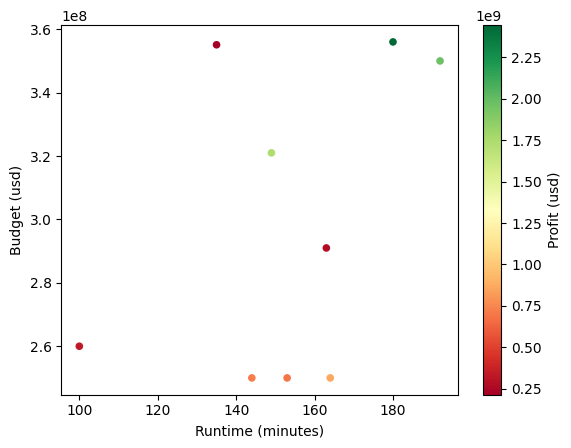

In [131]:
# matplotlib under the hood
highest_budget.plot(
    kind="scatter",
    x="Runtime (minutes)",
    y="Budget (usd)",
    c="Profit (usd)",
    colormap="RdYlGn",
)

In [136]:
# Cannot mask with non-boolean array containing NA / NaN values
df["Cast"].fillna("", inplace=True)
df[df["Cast"].str.contains("Johnny Depp")]

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes),Budget (usd),Worldwide Gross (usd),Profit (usd)
494,Pirates of the Caribbean: The Curse of the Bla...,8.1,Gore Verbinski,"Ted Elliott, Terry Rossio, Stuart Beattie",63.0,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...","August 15, 2003 (India)",United States,English,"$140,000,000 (estimated)","$654,264,546",2 hours 23 minutes,143,140000000,654264546,514264546
26,Platoon,8.1,Oliver Stone,Oliver Stone,92.0,"Charlie Sheen, Tom Berenger, Willem Dafoe, Kei...","February 13, 1989 (India)","United States, United Kingdom","English, Vietnamese","$6,000,000 (estimated)","$138,545,632",2 hours,120,6000000,138545632,132545632
495,Edward Scissorhands,7.9,Tim Burton,"Tim Burton, Caroline Thompson",74.0,"Johnny Depp, Winona Ryder, Dianne Wiest, Antho...","January 1, 1992 (India)",United States,English,"$20,000,000 (estimated)","$86,024,005",1 hour 45 minutes,105,20000000,86024005,66024005
355,Ed Wood,7.8,Tim Burton,"Rudolph Grey, Scott Alexander, Larry Karaszewski",71.0,"Johnny Depp, Martin Landau, Sarah Jessica Park...",1994 (India),United States,English,"$18,000,000 (estimated)","$5,888,045",2 hours 7 minutes,127,18000000,5888045,-12111955
141,What's Eating Gilbert Grape,7.7,Lasse Hallström,Peter Hedges,73.0,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...","March 4, 1994 (United States)",United States,English,"$11,000,000 (estimated)","$10,032,765",1 hour 58 minutes,118,11000000,10032765,-967235
153,Donnie Brasco,7.7,Mike Newell,"Joseph D. Pistone, Richard Woodley, Paul Attan...",77.0,"Al Pacino, Johnny Depp, Michael Madsen, Bruno ...","February 9, 2017 (India)",United States,"English, Italian, Japanese","$35,000,000 (estimated)","$124,909,762",2 hours 7 minutes,127,35000000,124909762,89909762
218,Finding Neverland,7.7,Marc Forster,"Allan Knee, David Magee",67.0,"Johnny Depp, Kate Winslet, Julie Christie, Rad...","January 28, 2005 (India)","United States, United Kingdom",English,"$25,000,000 (estimated)","$116,650,613",1 hour 46 minutes,106,25000000,116650613,91650613
311,Gonzo: The Life and Work of Dr. Hunter S. Thom...,7.6,Alex Gibney,"Alex Gibney, Hunter S. Thompson",73.0,"Hunter S. Thompson, Johnny Depp, Joe Cairo, Da...","July 18, 2008 (United States)",United States,"English, Portuguese",NaN,"$1,491,958",2 hours,120,<NA>,1491958,<NA>
464,When You're Strange,7.6,Tom DiCillo,Tom DiCillo,55.0,"Johnny Depp, John Densmore, Robby Krieger, Ray...","May 12, 2010 (United States)",United States,English,NaN,"$1,194,182",1 hour 26 minutes,86,<NA>,1194182,<NA>
67,Fear and Loathing in Las Vegas,7.5,Terry Gilliam,"Hunter S. Thompson, Terry Gilliam, Tony Grisoni",41.0,"Johnny Depp, Benicio Del Toro, Tobey Maguire, ...","May 22, 1998 (United States)",United States,English,"$18,500,000 (estimated)","$10,680,275",1 hour 58 minutes,118,18500000,10680275,-7819725


In [147]:
df.groupby(by="Director").agg(
    {
        "Worldwide Gross (usd)": "sum"
    }
).sort_values(by="Worldwide Gross (usd)", ascending=False).head(10).reset_index()

,Director,Worldwide Gross (usd)
0,James Cameron,8705319635
1,Steven Spielberg,7988558298
2,"Anthony Russo, Joe Russo",6721322058
3,Peter Jackson,6484962056
4,Christopher Nolan,6205459936
5,David Yates,5003353447
6,Jon Watts,3966372984
7,Joss Whedon,2966001713
8,J.J. Abrams,2924357232
9,Robert Zemeckis,2793892268


In [148]:
df["Year"] = df["Release Date"].apply(lambda x: int(re.search(r"\d{4}", x).group()))
df["Decade"] = df["Year"].apply(lambda x: round(x, -1))
df[["Release Date", "Year", "Decade"]].head()

,Release Date,Year,Decade
5,"October 14, 1994 (India)",1994,1990
1,"November 8, 2024 (Japan)",2024,2020
2,1978 (India),1978,1980
3,"April 1, 1975 (Turkey)",1975,1980
4,"September 25, 2001 (India)",2001,2000


In [149]:
df.to_parquet("pandas_parquet", partition_cols=["Decade"])

In [41]:
# https://github.com/yhat/pandasql/
# SQLite

In [150]:
# requires sqlalchemy
pd.read_sql_table(
    "orders",
    os.environ["SQL_CONNECTION"]
)

,id,created_at,updated_at,uploaded_at,data
0,1,2025-01-08 11:50:01+00:00,2025-01-08 11:50:01+00:00,2025-01-08 12:00:00+00:00,some string
1,2,2025-01-08 11:50:15+00:00,2025-01-08 11:50:15+00:00,2025-01-08 12:00:00+00:00,some other string
2,3,2025-01-08 11:51:06+00:00,2025-01-08 11:52:31+00:00,2025-01-08 12:00:00+00:00,other string
3,4,2025-01-08 11:52:01+00:00,2025-01-08 12:11:01+00:00,2025-01-08 12:00:00+00:00,changed order
4,5,2025-01-08 11:52:15+00:00,2025-01-08 11:52:15+00:00,2025-01-08 12:00:00+00:00,another string
5,6,2025-01-08 11:52:26+00:00,2025-01-08 11:54:31+00:00,2025-01-08 12:00:00+00:00,yolo string


Performance:
https://towardsdatascience.com/high-performance-data-processing-pandas-2-vs-polars-a-vcpu-perspective-e922d3064f4e